Text(0, 0.5, 'Yearly energy yield (W hr)')

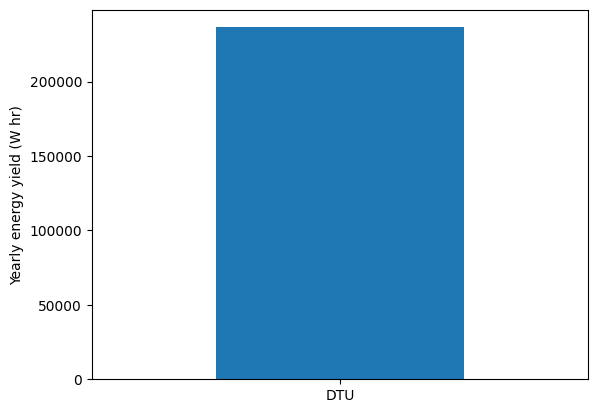

In [3]:
# Import necessary modules from pvlib
import pvlib

import pandas as pd

import matplotlib.pyplot as plt

import pytz
from pvlib.pvsystem import PVSystem, Array, FixedMount
from pvlib.location import Location
from pvlib.modelchain import ModelChain

# Initialize dictionary to store annual energy yield for each location
energies = {}
coordinat = (55.786327, 12.524295, 'DTU', 700, 'America/Danmarkshavn')
latitude = 55.786327
longitude = 12.524295
name = 'DTU'
altitude = 700
timeZone='America/Danmarkshavn'
# get the module and inverter specifications from SAM
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']
temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
weather = pvlib.iotools.get_pvgis_tmy(latitude, longitude)[0]
weather.index.name = "utc_time"
    
# Create Location object with latitude, longitude, name, altitude, and timezone
location = Location(
    latitude,
    longitude,
    name=name,
    altitude=altitude,
    tz=timeZone,
    )

# Define mount configuration with fixed surface tilt and azimuth
mount = FixedMount(surface_tilt=55.786327, surface_azimuth=180)
    
# Create Array object with the mount configuration, module parameters, and temperature model parameters
array = Array(
    mount=mount,
    module_parameters=module,
    temperature_model_parameters=temperature_model_parameters,
)

# Create PVSystem object with the array and inverter parameters
system = PVSystem(arrays=[array], inverter_parameters=inverter)
    
# Create ModelChain object with the PVSystem and Location
mc = ModelChain(system, location)
    
# Run the model using weather data
mc.run_model(weather)
    
# Calculate annual energy yield and store in the energies dictionary
annual_energy = mc.results.ac.sum()
energies[name] = annual_energy

# Convert energies dictionary to pandas Series
energies = pd.Series(energies)

# Plot the yearly energy yield as a bar chart
energies.plot(kind='bar', rot=0)
plt.ylabel('Yearly energy yield (W hr)')

In [10]:
import numpy as np

def solar_panel_projection(theta_sol, phi_sol, theta_panel, phi_panel):
    # Beregn solens enhedsvektor
    n_s = np.array([np.sin(theta_sol) * np.cos(phi_sol), np.sin(theta_sol) * np.sin(phi_sol), np.cos(theta_sol)])

    # Beregn panelens enhedsvektor
    n_p = np.array([np.sin(theta_panel) * np.cos(phi_panel), np.sin(theta_panel) * np.sin(phi_panel), np.cos(theta_panel)])

    # Beregn projektionen af solens enhedsvektor på panelens enhedsvektor
    projection = np.dot(n_s, n_p)

    # Returner projektionen hvis den er positiv, ellers returner 0
    return projection if projection > 0 else 0


In [9]:
import pandas as pd
import pvlib
from pvlib.location import Location

tidszone = "Europe/Copenhagen"
start_dato = "2024-01-01"
slut_dato = "2024-12-31"
delta_tid = "H"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.786327, 12.524295, tidszone, 700, "America/Danmarkshavn"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:59", inclusive="left", freq=delta_tid, tz=tidszone
)

# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()

apparent_zenith      zenith  apparent_elevation  \
2024-01-31 00:00:00+01:00       141.557311  141.557311          -51.557311   
2024-02-29 00:00:00+01:00       131.888594  131.888594          -41.888594   
2024-03-31 00:00:00+01:00       119.901557  119.901557          -29.901557   
2024-04-30 00:00:00+02:00       107.983119  107.983119          -17.983119   
2024-05-31 00:00:00+02:00       100.956151  100.956151          -10.956151   

                           elevation     azimuth  equation_of_time  
2024-01-31 00:00:00+01:00 -51.557311  351.107033        -13.242489  
2024-02-29 00:00:00+01:00 -41.888594  352.539697        -12.493639  
2024-03-31 00:00:00+01:00 -29.901557  355.956212         -4.151858  
2024-04-30 00:00:00+02:00 -17.983119  342.937475          2.784239  
2024-05-31 00:00:00+02:00 -10.956151  344.063478          2.324880